# Восстановление золота из руды

**Описание проекта:**    
    
Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Цель исследования:**

* Подготовить прототип модели машинного обучения для оптимизации производства

**Ход исследования:**

1. Подготовка данных
2. Анализ данных
3. Построение модели
4. Проверка модели

In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

## Подготовка данных

In [2]:
#Сохраним данные в переменных
data_train = pd.read_csv('gold_industry_train.csv')
data_test = pd.read_csv('gold_industry_test.csv')
data_full = pd.read_csv('gold_industry_full.csv')

In [3]:
#Создадим список из переменных и посмотрим информацию о каждом датасете
data_list = [data_train, data_test, data_full]
for data in data_list:
    display(data.head())
    display(data.info())
    display(data.describe())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


None

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

None

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


None

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


In [4]:
#Проверим данные на дубликаты
for data in data_list:
    print('Количество дубликатов в датасете:', data.duplicated().sum())

Количество дубликатов в датасете: 0
Количество дубликатов в датасете: 0
Количество дубликатов в датасете: 0


Во всех выборках присутствуют пропуски. Дуликатов нет. Предобработка будет позже.

Проверим правильность расчёта эффективности обогащения. Вычислим её на обучающей выборке для признака rougher.output.recover  
**Формула расчёта:**  
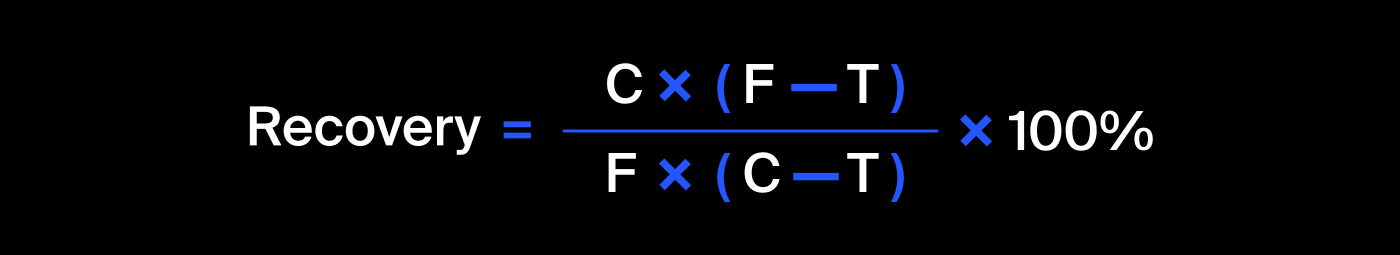  
**В которой:**  
C — доля золота в концентрате после флотации/очистки;  
F — доля золота в сырье до флотации/очистки;  
T — доля золота в отвальных хвостах после флотации/очистки.

In [5]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
#Сохраним расчёты в новом столбце и вычислим среднее
data_train['count_recovery'] = ((C*(F-T))/(F*(C-T)))*100
data_train['count_recovery'].mean()

82.52119968211336

In [6]:
#Посмотрим среднее признака rougher.output.recover
data_train['rougher.output.recovery'].mean()

82.52119968211336

Седние показатели равны, значит эффективность рассчитана правильно.

In [7]:
#Найдём MAE между нашими расчётами и значением признака
print(mean_absolute_error(data_train['count_recovery'], data_train['rougher.output.recovery']))

9.83758577644259e-15


In [8]:
#Удалим созданный столбец с расчётами
data_train.drop('count_recovery', axis=1, inplace=True)

МАЕ очень мало, поэтому правильность расчёта эффективности подтверждена.

In [9]:
#Добавим в тестовую выборку целевые признаки final.output.recovery и rougher.output.recovery
data_test = data_test.merge(data_full[['rougher.output.recovery', 'final.output.recovery']],
                                              how='left', left_index=True, right_index=True)

In [10]:
#Посмотрим признаки, которые недоступны в тестовой выборке
train_set=set(data_train.columns.to_list())
test_set=set(data_test.columns.to_list())
tt_set=train_set-test_set
tt_set


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

Обнаруженные признаки относятся к параметрам продукта и расчётным характеристикам. В тестовой выборке отсутствуют целевые признаки **final.output.recovery** и **rougher.output.recovery**. В тренировочной выборке присутствуют признаки, которые мы получаем в процессе флотации. Т.к. мы хотим получить предсказание до флотации, все признаки, которых нет в тестовой выборке, нам нужно удалить из тренировочной выборки, чтобы обучить модель. Целевые признаки нужно добавить в тестовую выборку.

In [11]:
#Проведём предобработку
#Посмотрим, есть ли нулевые значения у целевых признаков в тестовой и обучающей выборках
print(data_test[data_test['rougher.output.recovery'] == 0]['rougher.output.recovery'].count())
print(data_test[data_test['final.output.recovery'] == 0]['final.output.recovery'].count())
print(data_train[data_train['rougher.output.recovery'] == 0]['rougher.output.recovery'].count())
print(data_train[data_train['final.output.recovery'] == 0]['final.output.recovery'].count())

96
24
394
98


In [12]:
#Удалим строки с нулевыми значениями целевых признаков, т.к. для обучения модели они не будут полезны, а наоборот, 
#создадут помехи
data_train = data_train.drop(data_train[data_train['rougher.output.recovery'] == 0].index)
data_train = data_train.drop(data_train[data_train['final.output.recovery'] == 0].index)
data_test = data_test.drop(data_test[data_test['rougher.output.recovery'] == 0].index)
data_test = data_test.drop(data_test[data_test['final.output.recovery'] == 0].index)

In [13]:
#Заменим пропуски в данных методом ffill
data_list = [data_train, data_test, data_full]
for data in data_list:
    data.fillna(method= 'ffill', inplace=True)

In [14]:
#Проверим, остались ли пропуски в данных
for data in data_list:
    print(data.isna().sum())

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64
date                                          0
rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0
rougher.state.floatbank10_c_air            

**Вывод**  
Данные подготовлены:
* Изучена общая иформация о данных
* Проверена правильность расчёта эффективности обогащения
* Проведена предобработка данных - удалены ненужные признаки из тренировочной выборки, добавлены целевые признаки в тестовую выборку, пропуски в данных заменены подходящими значениями, удалён признак **date** за ненадобностью
* Строки с нулевыми значениями целевых признаков удалены

## Анализ данных

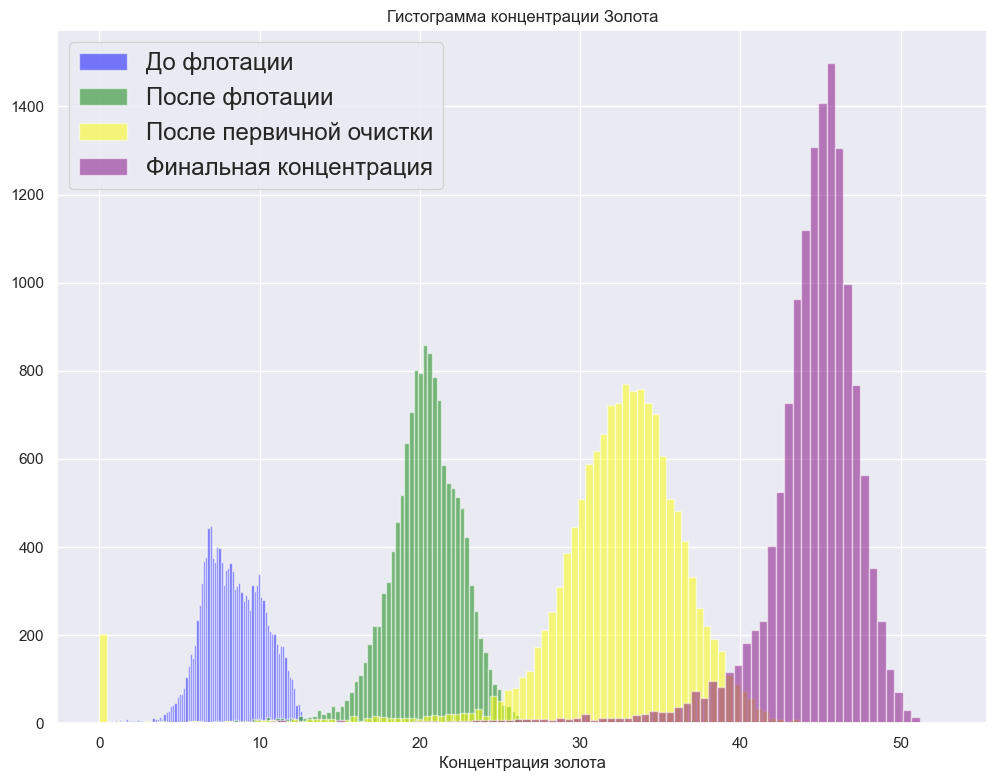

In [15]:
#Построим гистограмму концентрации золота
plt.figure(figsize=[12,9])

plt.hist(data_train['rougher.input.feed_au'], bins=100, label = 'До флотации', alpha=0.5, color='blue')
plt.hist(data_train['rougher.output.concentrate_au'], bins=100, label = 'После флотации', alpha=0.5,
                                                                                       color='green')
plt.hist(data_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'После первичной очистки',
                                                                                alpha=0.5, color='yellow')
plt.hist(data_train['final.output.concentrate_au'], bins=100, label = 'Финальная концентрация', alpha=0.5, color='purple')



plt.xlabel('Концентрация золота')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма концентрации Золота')
plt.show()

С каждым этапом концентрация золота повышается

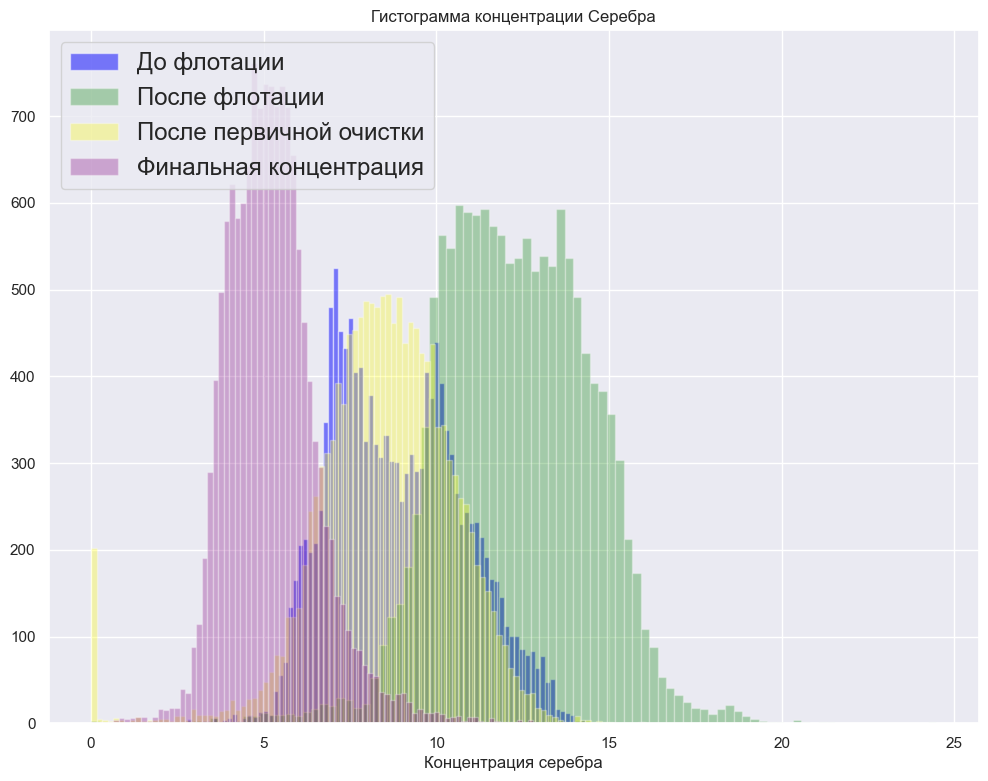

In [16]:
#Построим гистограмму концентрации серебра
plt.figure(figsize=[12,9])

plt.hist(data_train['rougher.input.feed_ag'], bins=100, label = 'До флотации', alpha=0.5, color='blue')
plt.hist(data_train['rougher.output.concentrate_ag'], bins=100, label = 'После флотации', alpha=0.3,
                                                                                       color='green')
plt.hist(data_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'После первичной очистки',
                                                                                alpha=0.3, color='yellow')
plt.hist(data_train['final.output.concentrate_ag'], bins=100, label = 'Финальная концентрация', alpha=0.3, color='purple')



plt.xlabel('Концентрация серебра')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма концентрации Серебра')
plt.show()

С каждым этапом концентрация серебра понижается, т.к. основной целью очистки является получение золота и избавление от прочих металлов

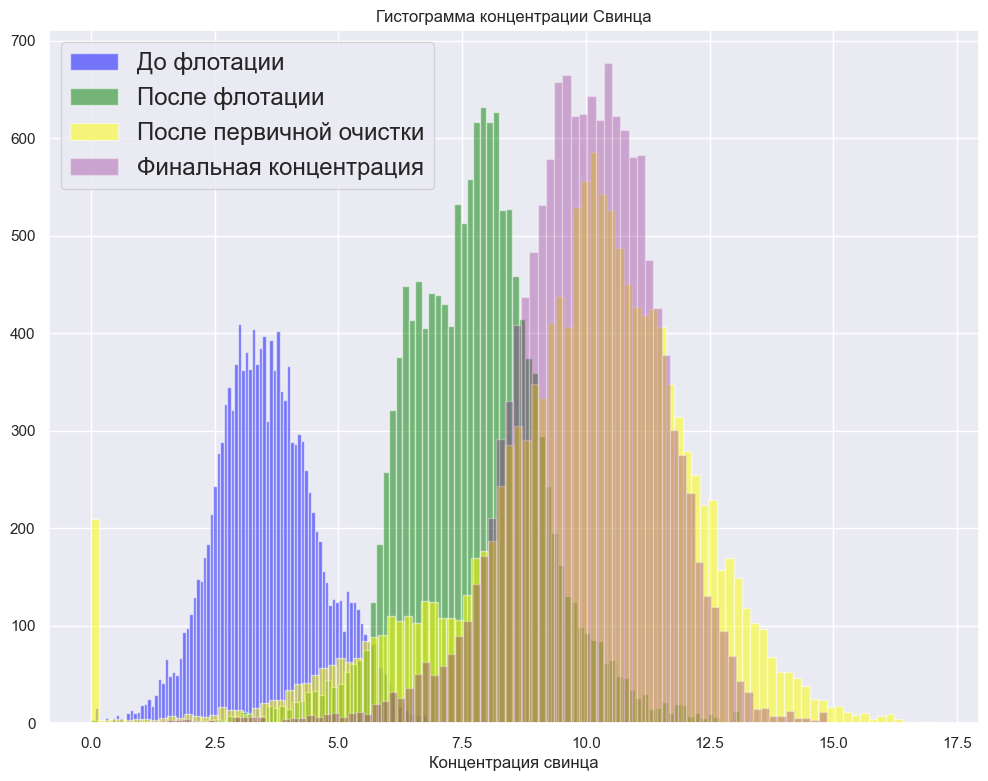

In [17]:
#Построим гистограмму концентрации свинца
plt.figure(figsize=[12,9])

plt.hist(data_train['rougher.input.feed_pb'], bins=100, label = 'До флотации', alpha=0.5, color='blue')
plt.hist(data_train['rougher.output.concentrate_pb'], bins=100, label = 'После флотации', alpha=0.5,
                                                                                       color='green')
plt.hist(data_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'После первичной очистки',
                                                                                alpha=0.5, color='yellow')
plt.hist(data_train['final.output.concentrate_pb'], bins=100, label = 'Финальная концентрация', alpha=0.3, color='purple')



plt.xlabel('Концентрация свинца')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма концентрации Свинца')
plt.show()

Концентрация свинца повышается после флотации и первичной очистки, потом не меняется

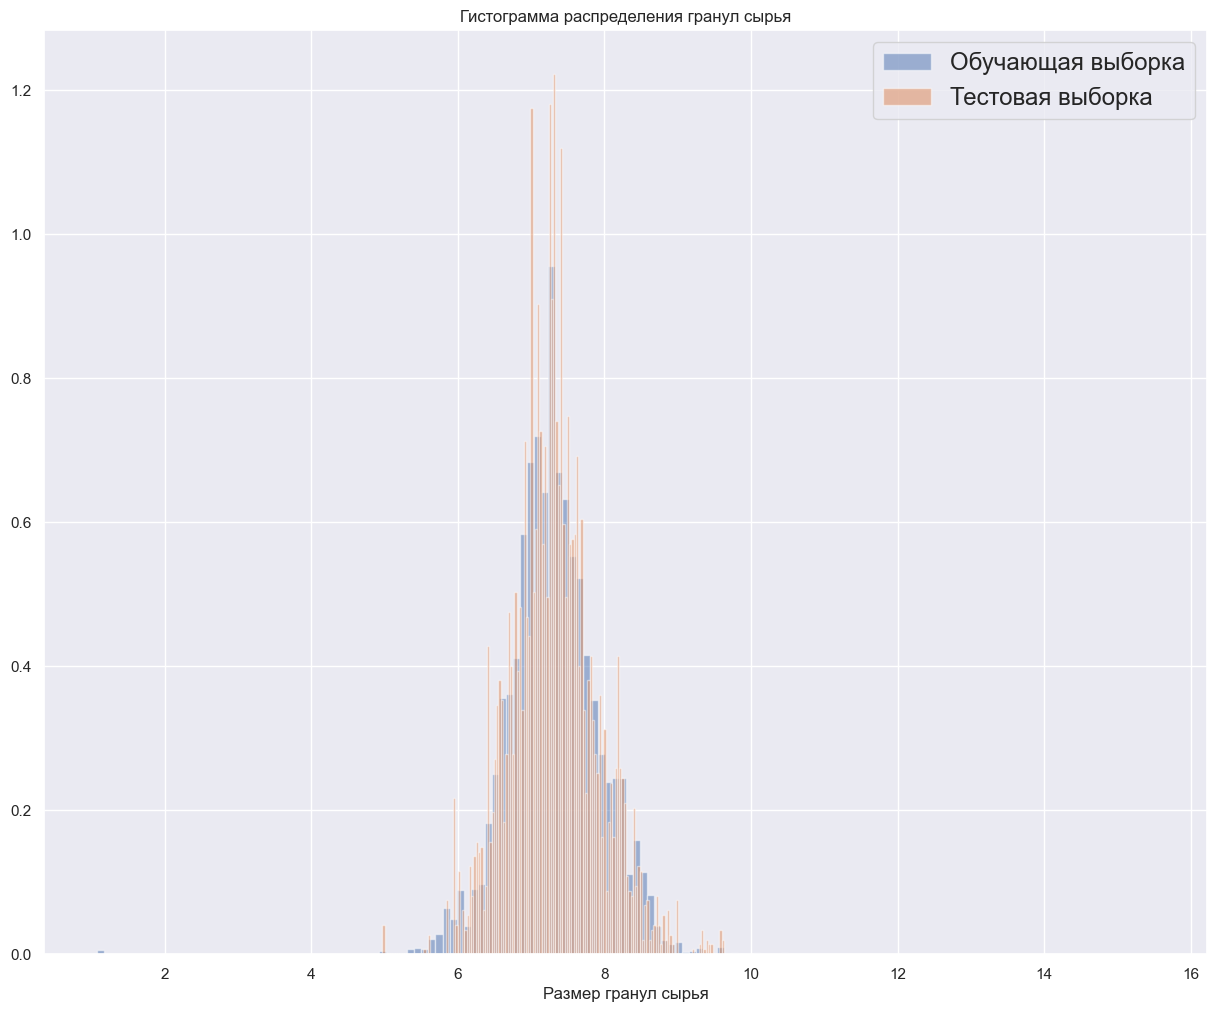

In [18]:
#Сравним распределения размеров гранул сырья на обучающей и тестовой выборках
#Построим гистограмму

plt.figure(figsize=[15,12])

plt.hist(data_train['primary_cleaner.input.feed_size'], bins=150, density=True, label = 'Обучающая выборка', alpha=0.5)
plt.hist(data_test['primary_cleaner.input.feed_size'], bins=150, density=True, label = 'Тестовая выборка', alpha=0.5)

plt.xlabel('Размер гранул сырья')

plt.legend(loc='upper right', fontsize='x-large')

plt.title('Гистограмма распределения гранул сырья')
plt.show()

Распределение гранул не сильно отличается, модель от этого не пострадает

In [19]:
#Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах
#Создадим переменные с нужными нам признаками

primary_conc = (data_train['primary_cleaner.output.concentrate_au'] + 
                                                data_train['primary_cleaner.output.concentrate_ag'] + 
                                                data_train['primary_cleaner.output.concentrate_pb'])

rougher_int_conc = (data_train['rougher.input.feed_au'] + 
                                        data_train['rougher.input.feed_ag'] + 
                                        data_train['rougher.input.feed_pb'])
rougher_out_conc = (data_train['rougher.output.concentrate_au'] + 
                                                data_train['rougher.output.concentrate_ag'] + 
                                                data_train['rougher.output.concentrate_pb'])
final_conc = (data_train['final.output.concentrate_au'] + 
                                      data_train['final.output.concentrate_ag'] + 
                                      data_train['final.output.concentrate_pb'])

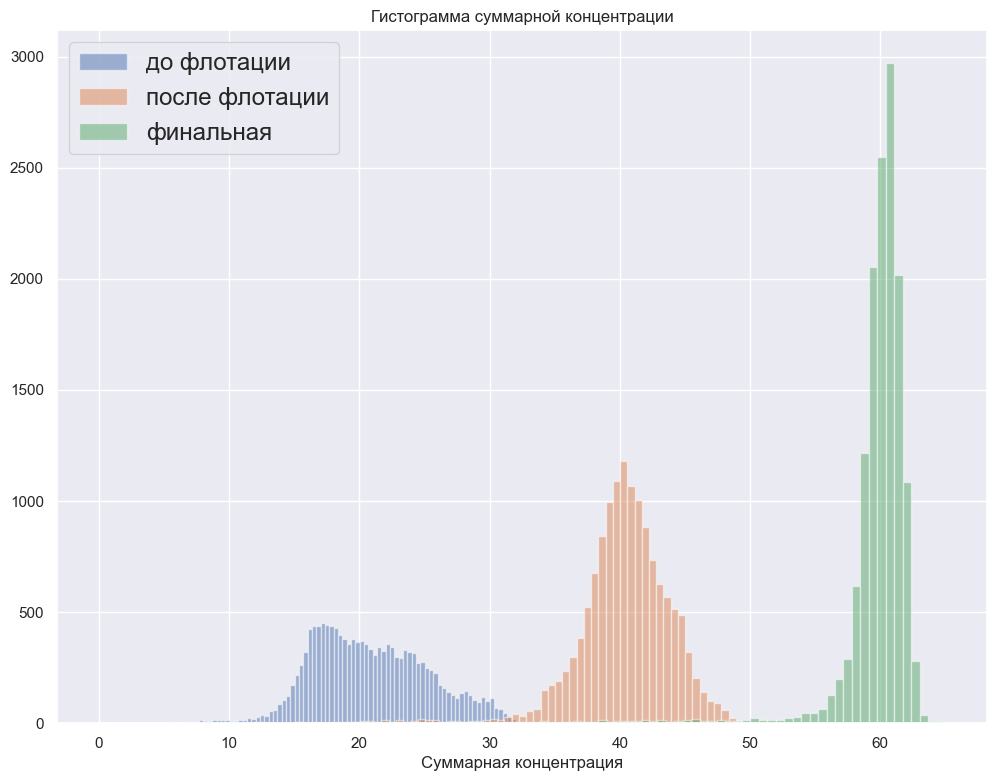

In [20]:
#Построим гистограмму
plt.figure(figsize=[12,9])

plt.hist(rougher_int_conc, bins=100, label = 'до флотации', alpha=0.5)
plt.hist(rougher_out_conc, bins=100, label = 'после флотации', alpha=0.5)
plt.hist(final_conc, bins=100, label = 'финальная', alpha=0.5)

plt.xlabel('Суммарная концентрация')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма суммарной концентрации')
plt.show()

На гистограмме видно, что с каждой стадией суммарная концентрация увеличивается

Построим гистограмму для поиска аномалий в стадиях "после флотации", "после первичной очистки" и "финальная"

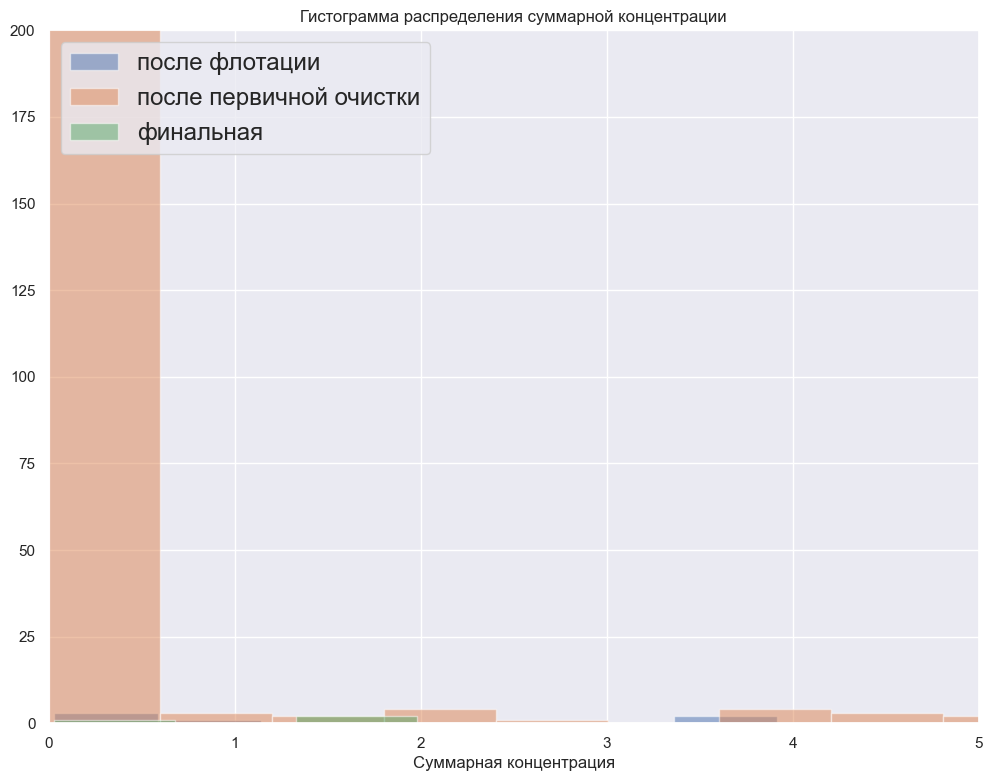

In [21]:
plt.figure(figsize=[12,9])

plt.hist(rougher_out_conc, bins=100, label = 'после флотации', alpha=0.5)
plt.hist(primary_conc, bins=100, label = 'после первичной очистки', alpha=0.5)
plt.hist(final_conc, bins=100, label = 'финальная', alpha=0.5)

plt.xlabel('Суммарная концентрация')
plt.xlim(0, 5)
plt.ylim(0, 200)

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма распределения суммарной концентрации')
plt.show()

Видим, что есть нулевые значения концентрации у всех троих признаков. Удалим все нулевые значения.

In [22]:
#Посмотрим размер тренировочной выборки
data_train.shape

(14089, 87)

In [23]:
#Удалим нулевые значения
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_au'] == 0].index)
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_ag'] == 0].index)
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_pb'] == 0].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_au'] == 0].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_ag'] == 0].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_pb'] == 0].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_au'] == 0].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_ag'] == 0].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_pb'] == 0].index)

In [24]:
#Посмотрим размер тренировочной выборки
data_train.shape

(13983, 87)

In [25]:
#Удалим ненужные признаки из тренировочной выборки
data_train = data_train.drop(list(tt_set), axis=1)

In [26]:
#Проверим удаление признаков
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13983 entries, 0 to 14578
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        13983 non-null  object 
 1   rougher.input.feed_au                       13983 non-null  float64
 2   rougher.input.feed_ag                       13983 non-null  float64
 3   rougher.input.feed_pb                       13983 non-null  float64
 4   rougher.input.feed_sol                      13983 non-null  float64
 5   rougher.input.feed_rate                     13983 non-null  float64
 6   rougher.input.feed_size                     13983 non-null  float64
 7   rougher.input.floatbank10_sulfate           13983 non-null  float64
 8   rougher.input.floatbank10_xanthate          13983 non-null  float64
 9   rougher.state.floatbank10_a_air             13983 non-null  float64
 10  rougher.st

In [27]:
#Удалим столбец с датой из датасетов, т.к. он не понадобится для предсказания
data_list = [data_train, data_test, data_full]

for data in data_list:
    data.drop('date', axis=1, inplace=True)

**Вывод:**  
* Исследованы изменения концентрации золота, серебра и свинца. Концентрация золота увеличивается с каждым этапом, концентрация серебра уменьшается, концентрация свинца увеличивается после первичной очистки и больше не меняется.
* Проведено сравнение распределения размеров гранул сырья в обучающей и тестовой выборках. Различия незначительны, на обучение модели это не повлияет.
* Исследована суммарная концентрация всех веществ на разных стадиях. Обнаружены аномалии, которые мы удалили.

## Модель

In [28]:
#Напишем функцию вычисления итоговой sMAPE
def smape(target, predict):
    return 1/len(target) * np.sum(2*np.abs(target - predict) / (np.abs(target) + np.abs(predict))*100)
def smape_final(rougher, final):
    return 0.25*rougher + 0.75*final

In [29]:
#Разделим обучающую выборку на признаки и целевой признак
features_rougher_train = data_train.drop(['rougher.output.recovery'], axis=1).filter(regex='^rougher',axis=1)
target_rougher_train = data_train['rougher.output.recovery']
print(features_rougher_train.shape)
print(target_rougher_train.shape)

features_final_train = data_train.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_final_train = data_train['final.output.recovery']
print(features_final_train.shape)
print(target_final_train.shape)

(13983, 22)
(13983,)
(13983, 52)
(13983,)


In [30]:
#Разделим тестовую выборку на признаки и целевой признак
features_rougher_test = data_test.filter(regex='^rougher',axis=1).drop(['rougher.output.recovery'], axis=1)
target_rougher_test = data_test['rougher.output.recovery']
print(features_rougher_test.shape)
print(target_rougher_test.shape)

features_final_test = data_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_final_test = data_test['final.output.recovery']
print(features_final_test.shape)
print(target_final_test.shape)

(4742, 22)
(4742,)
(4742, 52)
(4742,)


In [31]:
#Обучим модель решающего дерева
for depth in range(1, 13, 2):
    model_tree = DecisionTreeRegressor(random_state=12345, max_depth = depth)
    scorer = make_scorer(smape, greater_is_better=False)
    tree_rougher = -1 * cross_val_score(model_tree, features_rougher_train, target_rougher_train, scoring=scorer, cv=5)
    tree_final = -1 * cross_val_score(model_tree, features_final_train, target_final_train, scoring=scorer, cv=5)
    print('Глубина:',depth)
    print('Итоговая sMAPE:', smape_final(tree_rougher, tree_final).mean())

Глубина: 1
Итоговая sMAPE: 8.793923155447228
Глубина: 3
Итоговая sMAPE: 8.581110005262698
Глубина: 5
Итоговая sMAPE: 9.079104321709126
Глубина: 7
Итоговая sMAPE: 10.196724629979121
Глубина: 9
Итоговая sMAPE: 11.393807561653114
Глубина: 11
Итоговая sMAPE: 12.636375345219433


Лучшее значение итоговой sMAPE у дерева с глубиной **3** и равна **8.58**

In [32]:
#Код грузится 40 минут
#Обучим модель случайного леса
best_depth = 0
best_est = 0
best_smape = 10

for est in range(10, 51, 10):   
    for depth in range (1, 13):
        model_forest = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        forest_rougher = -1 * cross_val_score(model_forest, features_rougher_train, target_rougher_train, scoring=scorer, cv=5)
        forest_final = -1 * cross_val_score(model_forest, features_final_train, target_final_train, scoring=scorer, cv=5)
        total_score = smape_final(forest_rougher, forest_final).mean()
        if total_score < best_smape:
            best_smape = total_score
            best_est = est
            best_depth = depth
            
print('Итоговая sMAPE:', total_score)
print('Количество деревьев', best_est)
print('Лучшая глубина', best_depth)

Итоговая sMAPE: 9.057265505930035
Количество деревьев 50
Лучшая глубина 2


Итоговая sMAPE случайного леса хуже, чем у решающего дерева и равна 9.05

In [33]:
#Обучим модель линейной регрессии
scaler = StandardScaler()
scaler.fit(features_rougher_train) 
features_rouger_train = scaler.transform(features_rougher_train)

scaler = StandardScaler()
scaler.fit(features_final_train) 
features_final_train = scaler.transform(features_final_train)

model_reg = LinearRegression()
reg_rougher = -1 * cross_val_score(model_reg, features_rougher_train, target_rougher_train, scoring=scorer, cv=5)
reg_final = -1 * cross_val_score(model_reg, features_final_train, target_final_train, scoring=scorer, cv=5)
print('Итоговая sMAPE:', smape_final(reg_rougher, reg_final).mean())

Итоговая sMAPE: 8.754271999162702


Итоговая sMAPE линейной регрессии равна **8.75**

**Вывод:**  
Лучший показатель sMAPE выявлен у дерева решений с глубиной **3**. Его мы и проверим на тестовой выборке.

In [38]:
#Проверим модель на тестовой выборке
model_rough = DecisionTreeRegressor(random_state=12345, max_depth=3)
model_rough.fit(features_rougher_train, target_rougher_train)
predict_rough = pd.Series(model_rough.predict(features_rougher_test))
smape_rough = smape(target_rougher_test, predict_rough).mean()

model_final = DecisionTreeRegressor(random_state=12345, max_depth=3)
model_final.fit(features_final_train, target_final_train)
predict_final = pd.Series(model_final.predict(features_final_test))
smape_fin = smape(target_final_test, predict_final).mean()

print('Итоговая sMAPE:', smape_final(smape_rough, smape_fin).mean())

Итоговая sMAPE: 11.937603930258994


C:\Users\Mc1air\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [39]:
#Проверим адекватность модели
dummy_rough = DummyRegressor(strategy="mean")
dummy_rough.fit(features_rougher_train, target_rougher_train)
predict_rough = dummy_rough.predict(features_rougher_test)
smape_rough_dumm = smape(target_rougher_test, predict_rough).mean()

dummy_final = DummyRegressor(strategy="mean")
dummy_final.fit(features_final_train, target_final_train)
predict_final = dummy_final.predict(features_final_test)
smape_fin_dumm = smape(target_final_test, predict_final).mean()

smape_dummy = smape_final(smape_rough_dumm, smape_fin_dumm)
print('Итоговая sMAPE на dummy:', smape_dummy)

Итоговая sMAPE на dummy: 9.559259941837977


**Вывод:**  
* Проверка на адекватность показала, что модель вменяемая
* На тестовой выборке было получено значение итоговой sMAPE, равное **11.93**. Многовато, конечно, но приемлемо